Data Description: There are two datasets of interest provided. players.csv has information regarding player statistics and sessions.csv has information regarding their performance statistics.

The dataset used in this project is the Players.csv dataset, as it contains statistics and information regarding player engagement. There are seven variables. Each row is a unique observation, where each variable (column) describes them. 
- Experience: categorical; player's skill level
- Subscribe: true/false; player is/isn't subscribed to the newsletter
- hashedemail: character;player's email, not relevant in this specific project
- played_hours: numeric; total game play 
- name: character; player name, irrelevant in this project
- gender: categorical; player gender, irrelevant to this project
- age: numeric; player age

An issue within the data is that played_hours and age will have to be standardized, and the N/A values need to be filtered.

Summary statistics for Age: Average age is 21.14 years
Summary statistics for played_hours: Average played time is 5.85 hours

Broad Question: What player characteristics are the most predictive of subscribing to a game-related newsletter,  and how do these features vary between various player types?

Specific Question: Can a player's game engagement predict if they will subscribe to the newsletter?

To answer my specific question, I will utilize the data about engagement within the players.csv dataset, as it also contains the response variable (subscribe). In order to clean up my data and get it ready, I will filter out any N/A variables and standardize the data. 

In [1]:
 ### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
players <- read_csv("https://raw.githubusercontent.com/ishmandeol/Project-Planning-Stage/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [8]:
players_clean <- players |>
    select(experience, subscribe, played_hours, Age)

players_clean

experience,subscribe,played_hours,Age
<chr>,<lgl>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Veteran,TRUE,3.8,17
Veteran,FALSE,0.0,17
⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,57
Amateur,FALSE,2.3,17
Pro,TRUE,0.2,NA


In [3]:
sessions <- read_csv("https://raw.githubusercontent.com/ishmandeol/Project-Planning-Stage/refs/heads/main/sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
players_avg <- players |>
    select(where(is.numeric)) |>
    summarize(played_avg= mean(played_hours),
             avg_age = mean(Age, na.rm= TRUE))

players_avg 

played_avg,avg_age
<dbl>,<dbl>
5.845918,21.13918


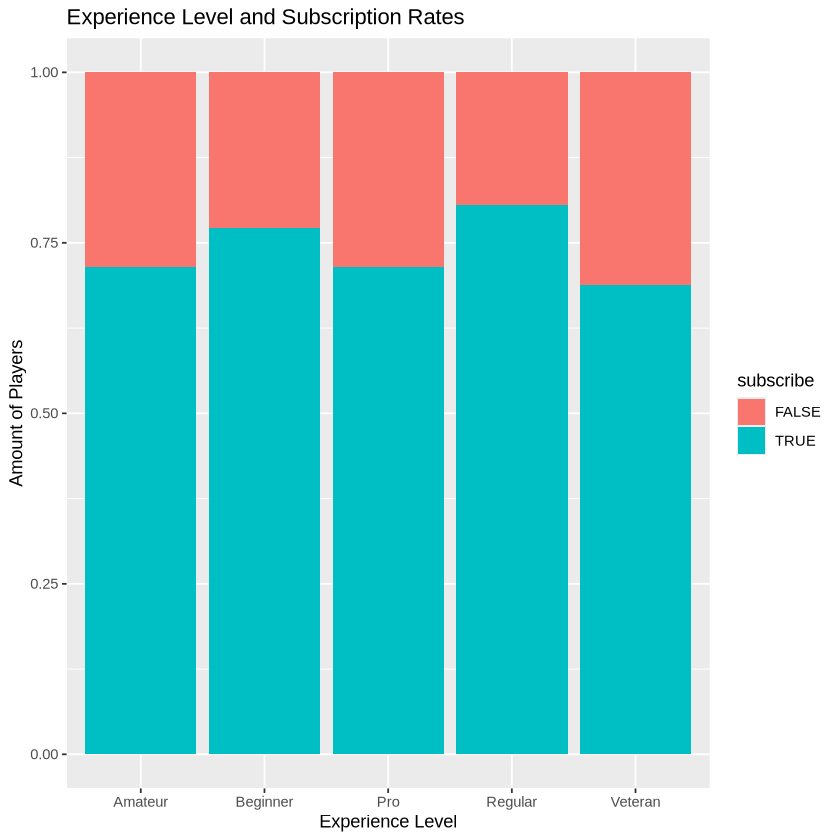

In [5]:
player_barplot <- players |>
    ggplot(aes(x=experience, fill= subscribe)) +
    geom_bar(position="fill") +
    labs(x="Experience Level", y="Amount of Players", title="Experience Level and Subscription Rates")

player_barplot

This bar plot indicates there is a positive correlation between higher experience levels and subscription rates. This correlation also suggests that players that have more experience are more engaged with their community, therefore feeling the need to subscribe.  The overall trend aligns with the idea that greater experience increases the likelihood of subscription, making this a valuable variable that can be utilized when predicting.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


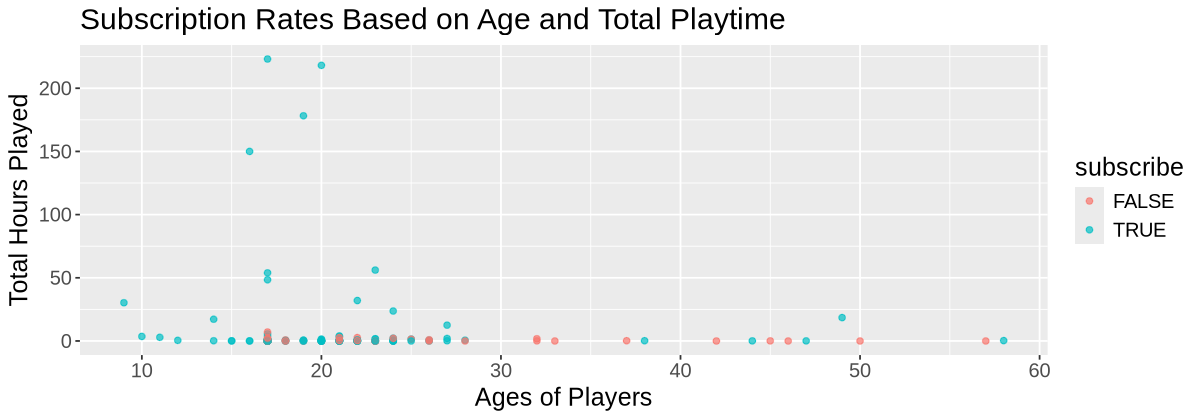

In [7]:
options(repr.plot.height = 3.5, repr.plot.width = 10)
player_scatterplot <- players |>
    ggplot(aes(x=Age, y=played_hours, color=subscribe)) +
    geom_point(alpha=0.7) +
    labs(x="Ages of Players", y="Total Hours Played", title="Subscription Rates Based on Age and Total Playtime") +
    theme(text = element_text(size=15))

player_scatterplot

This scatterplot adresses the relationship between age and hours played, and whether or not this relationship will help us indicate subscription likelihood. The overall trend stresses the idea that higher engagement typically demonstrates a higher subscription rate. However, age is not a strong indicator of subscription, as there is no strong relationship or correlation witnessed.

To address my question, I would use a knn regression model since the data is nonlinear. The model will help me predict if players are likely to subscribe to the newsletter based on player engagement characteristics like age and hours played. An assumption that is required is for the data to be within a similar range, as knn predictions do not perform the best outside of the inputted data range. A prominent limitation would be dataset size and chosing the right K, which can be found using multiple fold cross-validation with my training data. To process the data, I would filter out any N/A values, and then split my data 80/20, where 80% is used to train. In order to make my results reproducible, I will set a seed and standardize my data so predictors with a larger range are not more prominent in decision making. 

GitHub Repository Link: https://github.com/ishmandeol/Project-Planning-Stage 